In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc, Circle


In [2]:
## Set 

game_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=\
&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=\
28800&GROUP_ID=&GameEventID=&GameID=0041500407&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=\
0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=\
&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=\
&Season=2015-16&SeasonSegment=&SeasonType=Playoffs&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=\
&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='



In [3]:
game_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=\
&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800\
&GROUP_ID=&GameEventID=&GameID=0021501228&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0\
&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=\
&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=\
&Season=2015-16&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0\
&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=\
&VsPlayerID4=&VsPlayerID5=&VsTeamID='



### Split the url into base_url and the search paramaters

In [4]:
def get_base_params(url):
    base_url, params = url.split('?')
    params_dict = dict([param.split('=') for param in params.split('&')])
    return base_url, params_dict

In [5]:
base_url, params = get_base_params(game_url)


Split all the individual search parameters

In [6]:
params

{'AheadBehind': '',
 'CFID': '',
 'CFPARAMS': '',
 'ClutchTime': '',
 'Conference': '',
 'ContextFilter': '',
 'ContextMeasure': 'FGA',
 'DateFrom': '',
 'DateTo': '',
 'Division': '',
 'EndPeriod': '10',
 'EndRange': '28800',
 'GROUP_ID': '',
 'GameEventID': '',
 'GameID': '0021501228',
 'GameSegment': '',
 'GroupID': '',
 'GroupMode': '',
 'GroupQuantity': '5',
 'LastNGames': '0',
 'LeagueID': '00',
 'Location': '',
 'Month': '0',
 'OnOff': '',
 'OpponentTeamID': '0',
 'Outcome': '',
 'PORound': '0',
 'Period': '0',
 'PlayerID': '0',
 'PlayerID1': '',
 'PlayerID2': '',
 'PlayerID3': '',
 'PlayerID4': '',
 'PlayerID5': '',
 'PlayerPosition': '',
 'PointDiff': '',
 'Position': '',
 'RangeType': '0',
 'RookieYear': '',
 'Season': '2015-16',
 'SeasonSegment': '',
 'SeasonType': 'Regular Season',
 'ShotClockRange': '',
 'StartPeriod': '1',
 'StartRange': '0',
 'StarterBench': '',
 'TeamID': '0',
 'VsConference': '',
 'VsDivision': '',
 'VsPlayerID1': '',
 'VsPlayerID2': '',
 'VsPlayerID3'

In [7]:
import requests
headers = {
    'Referer' : 'https://stats.nba.com',
    'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36',
    'x-nba-stats-origin' : 'stats',
    'x-nba-stats-token': 'true',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'Accept': 'application/json'
}
r = requests.get(base_url, params=params, headers=headers)

In [8]:
r.headers

{'Pragma': 'no-cache', 'Content-Type': 'application/json; charset=utf-8', 'Last-Modified': 'Mon, 27 Jul 2020 00:10:25 GMT', 'Server': 'Microsoft-IIS/7.5', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'ASP.NET', 'Content-Encoding': 'gzip', 'Content-Length': '4377', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Expires': 'Mon, 27 Jul 2020 00:10:45 GMT', 'Date': 'Mon, 27 Jul 2020 00:10:45 GMT', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Set-Cookie': 'ak_bmsc=6AEDFB810065DC061BAC69C9F8431CBB60110B5584240000851B1E5FADA95507~plMH4/zKh201kQcDcuIpNeQ4OjVU9J3n54baUcrft0PlIFXXksG7+OvG0hkPDDRbuoJSiOSl3gtVuWdaRldvDue22YBSKn1Ie354VLYO73LaiStFN9wjvWK1172zd2AjocQ5IiOJU1EiYda/qpCRP7vNS8Q2wuECH9RLxS2l9GRaHvmr2WZ2hQMHx2gUyRJ/r3m5mGviOH3IcrZpiQZtW4qeUNFp32XgyX6eg0LD1ZjHI6a3qcLeqZXuMxJ+VjrSQ7; expires=Mon, 27 Jul 2020 02:10:45 GMT; max-age=7200; path=/; domain=.nba.com; HttpOnly', 'Strict-Transport-Security': 'max-age=86400'}

In [9]:
json_data = r.json()
json_data.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [10]:
result = json_data['resultSets'][0]
result.keys()

dict_keys(['name', 'headers', 'rowSet'])

In [11]:

pd.options.display.max_columns = 100
columns = result['headers']
data = result['rowSet']
df_shots = pd.DataFrame(data=data, columns=columns)
df_shots.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021501228,2,202330,Gordon Hayward,1610612762,Utah Jazz,1,11,40,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,7,1,0,20160413,LAL,UTA
1,Shot Chart Detail,0021501228,5,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,11,25,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,137,203,1,0,20160413,LAL,UTA
2,Shot Chart Detail,0021501228,8,203918,Rodney Hood,1610612762,Utah Jazz,1,11,12,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,8,-11,82,1,0,20160413,LAL,UTA
3,Shot Chart Detail,0021501228,10,203481,Jeff Withey,1610612762,Utah Jazz,1,10,59,Made Shot,Floating Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-43,46,1,1,20160413,LAL,UTA
4,Shot Chart Detail,0021501228,11,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,10,44,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,19,199,11,1,0,20160413,LAL,UTA


In [12]:
## Examine the shot type distribution

In [13]:
df_shots.SHOT_TYPE.value_counts()

2PT Field Goal    113
3PT Field Goal     55
Name: SHOT_TYPE, dtype: int64

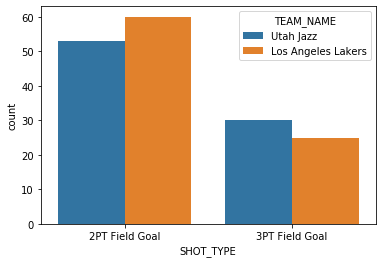

In [14]:
sns.countplot(df_shots.SHOT_TYPE, hue = df_shots.TEAM_NAME)

## Play by Play to get Free Throws


In [15]:
play_by_play_url = 'https://stats.nba.com/stats/playbyplayv2?\
EndPeriod=10&EndRange=28800&GameID=0021501228&RangeType=0&Season=2015-16&\
SeasonType=Regular Season&StartPeriod=1&StartRange=0'

In [16]:
pbp_base_url, pbp_params = get_base_params(play_by_play_url)

In [17]:
pbp_params

{'EndPeriod': '10',
 'EndRange': '28800',
 'GameID': '0021501228',
 'RangeType': '0',
 'Season': '2015-16',
 'SeasonType': 'Regular Season',
 'StartPeriod': '1',
 'StartRange': '0'}

In [18]:
r = requests.get(pbp_base_url, params=pbp_params, headers=headers)
pbp_json_data = r.json()
pbp_results = pbp_json_data['resultSets'][0]
pbp_data = pbp_results['rowSet']
pbp_columns = pbp_results['headers']
df_pbp = pd.DataFrame(data=pbp_data, columns=pbp_columns)
df_pbp.head(5)


,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0021501228,0,12,0,1,10:49 PM,12:00,None,None,None,None,None,0.0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0
1,0021501228,1,10,0,1,10:49 PM,12:00,Jump Ball Hibbert vs. Withey: Tip to Lyles,None,None,None,None,4.0,201579,Roy Hibbert,1.610613e+09,Los Angeles,Lakers,LAL,5,203481,Jeff Withey,1.610613e+09,Utah,Jazz,UTA,5,1626168,Trey Lyles,1.610613e+09,Utah,Jazz,UTA,1
2,0021501228,2,2,5,1,10:49 PM,11:40,None,None,MISS Hayward 2' Layup,None,None,5.0,202330,Gordon Hayward,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
3,0021501228,3,4,0,1,10:49 PM,11:39,Randle REBOUND (Off:0 Def:1),None,None,None,None,4.0,203944,Julius Randle,1.610613e+09,Los Angeles,Lakers,LAL,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1
4,0021501228,5,2,1,1,10:50 PM,11:25,MISS Bryant 24' 3PT Jump Shot,None,None,None,None,4.0,977,Kobe Bryant,1.610613e+09,Los Angeles,Lakers,LAL,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1


Free Throws are EVENTMSGTYPE = 3

In [19]:
df_ft = df_pbp[df_pbp.EVENTMSGTYPE == 3]
df_ft.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN,PERSON1TYPE,PLAYER1_ID,PLAYER1_NAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ABBREVIATION,PERSON2TYPE,PLAYER2_ID,PLAYER2_NAME,PLAYER2_TEAM_ID,PLAYER2_TEAM_CITY,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
57,0021501228,63,3,11,1,11:00 PM,4:57,None,None,Withey Free Throw 1 of 2 (3 PTS),7 - 6,-1,5.0,203481,Jeff Withey,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0
59,0021501228,66,3,12,1,11:01 PM,4:57,None,None,MISS Withey Free Throw 2 of 2,None,None,5.0,203481,Jeff Withey,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0
68,0021501228,76,3,10,1,11:02 PM,4:14,Bryant Free Throw 1 of 1 (7 PTS),None,None,7 - 11,4,4.0,977,Kobe Bryant,1.610613e+09,Los Angeles,Lakers,LAL,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0
88,0021501228,100,3,13,1,11:08 PM,1:47,Bryant Free Throw 1 of 3 (13 PTS),None,None,14 - 17,3,4.0,977,Kobe Bryant,1.610613e+09,Los Angeles,Lakers,LAL,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0
89,0021501228,102,3,14,1,11:08 PM,1:47,Bryant Free Throw 2 of 3 (14 PTS),None,None,14 - 18,4,4.0,977,Kobe Bryant,1.610613e+09,Los Angeles,Lakers,LAL,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0


In [20]:
### Get Home and Away Teams from Database

In [21]:
home_team = df_shots.loc[0, 'HTM']
visitor_team = df_shots.loc[0, 'VTM']

## Clean Databases to Merge Data

Shot Database

In [22]:
df_shots.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [23]:
shot_cols = ['GAME_EVENT_ID', 'PLAYER_NAME', 'PLAYER_ID', 'TEAM_NAME', 'TEAM_ID', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'SHOT_TYPE', 'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']

df_shots = df_shots[shot_cols]

df_shots.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17,7,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137,203,0
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11,82,0
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43,46,1
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199,11,0


FT Database

In [24]:
df_ft.columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

In [25]:
ft_cols = ['EVENTNUM', 'PERIOD', 'PCTIMESTRING', 'SCORE', 'PLAYER1_NAME', 'PLAYER1_ID',
           'PLAYER1_TEAM_CITY', 'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION']

df_ft = df_ft[ft_cols]

In [26]:
df_ft.head()

,EVENTNUM,PERIOD,PCTIMESTRING,SCORE,PLAYER1_NAME,PLAYER1_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_ABBREVIATION
57,63,1,4:57,7 - 6,Jeff Withey,203481,Utah,Jazz,1.610613e+09,UTA
59,66,1,4:57,None,Jeff Withey,203481,Utah,Jazz,1.610613e+09,UTA
68,76,1,4:14,7 - 11,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL
88,100,1,1:47,14 - 17,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL
89,102,1,1:47,14 - 18,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL


### Making the free throw data look like the shot chart data

Rename columns of FT Dataframe so they match te Shot DF

In [27]:
df_ft = df_ft.rename(columns = {'EVENTNUM': 'GAME_EVENT_ID' , 'PLAYER1_NAME':'PLAYER_NAME', 
                        'PLAYER1_ID':'PLAYER_ID', 'PLAYER1_TEAM_ID': 'TEAM_ID'  })

Make times in the FT DF in the same format as the Shot DF

In [28]:
df_ft['MINUTES_REMAINING'] = df_ft['PCTIMESTRING'].apply(lambda x : int(x.split(':')[0]))

df_ft['SECONDS_REMAINING'] = df_ft['PCTIMESTRING'].apply(lambda x : int(x.split(':')[1]))

df_ft.drop('PCTIMESTRING', axis = 1, inplace = True)

df_ft.head()

,GAME_EVENT_ID,PERIOD,SCORE,PLAYER_NAME,PLAYER_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,TEAM_ID,PLAYER1_TEAM_ABBREVIATION,MINUTES_REMAINING,SECONDS_REMAINING
57,63,1,7 - 6,Jeff Withey,203481,Utah,Jazz,1.610613e+09,UTA,4,57
59,66,1,None,Jeff Withey,203481,Utah,Jazz,1.610613e+09,UTA,4,57
68,76,1,7 - 11,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL,4,14
88,100,1,14 - 17,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL,1,47
89,102,1,14 - 18,Kobe Bryant,977,Los Angeles,Lakers,1.610613e+09,LAL,1,47


Have one column for TEAM_NAME

In [29]:
df_ft['TEAM_NAME'] = df_ft.PLAYER1_TEAM_CITY + ' ' + df_ft.PLAYER1_TEAM_NICKNAME

df_ft.drop(['PLAYER1_TEAM_CITY', 'PLAYER1_TEAM_NICKNAME'], axis = 1, inplace = True)

df_ft.head()

,GAME_EVENT_ID,PERIOD,SCORE,PLAYER_NAME,PLAYER_ID,TEAM_ID,PLAYER1_TEAM_ABBREVIATION,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME
57,63,1,7 - 6,Jeff Withey,203481,1.610613e+09,UTA,4,57,Utah Jazz
59,66,1,None,Jeff Withey,203481,1.610613e+09,UTA,4,57,Utah Jazz
68,76,1,7 - 11,Kobe Bryant,977,1.610613e+09,LAL,4,14,Los Angeles Lakers
88,100,1,14 - 17,Kobe Bryant,977,1.610613e+09,LAL,1,47,Los Angeles Lakers
89,102,1,14 - 18,Kobe Bryant,977,1.610613e+09,LAL,1,47,Los Angeles Lakers


Drop Team Abreviation Column

In [30]:
# Save team abreviations as a Dictionary for later use
team_dic = dict(df_ft[['PLAYER1_TEAM_ABBREVIATION', 'TEAM_NAME']].drop_duplicates().values)
                
df_ft.drop('PLAYER1_TEAM_ABBREVIATION', inplace= True, axis = 1)

### Getting SHOT_MADE_FLAG (1 = made, 0 = miss)

In [31]:
def shot_made(score):
    if type(score) == str:
        return int(1)
    else:
        return int(0)

df_ft['SHOT_MADE_FLAG'] = df_ft.SCORE.apply(lambda x: shot_made(x))

df_ft.drop('SCORE', axis = 1, inplace = True)

df_ft.head()

,GAME_EVENT_ID,PERIOD,PLAYER_NAME,PLAYER_ID,TEAM_ID,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME,SHOT_MADE_FLAG
57,63,1,Jeff Withey,203481,1.610613e+09,4,57,Utah Jazz,1
59,66,1,Jeff Withey,203481,1.610613e+09,4,57,Utah Jazz,0
68,76,1,Kobe Bryant,977,1.610613e+09,4,14,Los Angeles Lakers,1
88,100,1,Kobe Bryant,977,1.610613e+09,1,47,Los Angeles Lakers,1
89,102,1,Kobe Bryant,977,1.610613e+09,1,47,Los Angeles Lakers,1


### ADD a column for free throw SHOT_TYPE 

In [32]:
df_ft['SHOT_TYPE'] = 'Free Throw'

df_ft.head()

,GAME_EVENT_ID,PERIOD,PLAYER_NAME,PLAYER_ID,TEAM_ID,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME,SHOT_MADE_FLAG,SHOT_TYPE
57,63,1,Jeff Withey,203481,1.610613e+09,4,57,Utah Jazz,1,Free Throw
59,66,1,Jeff Withey,203481,1.610613e+09,4,57,Utah Jazz,0,Free Throw
68,76,1,Kobe Bryant,977,1.610613e+09,4,14,Los Angeles Lakers,1,Free Throw
88,100,1,Kobe Bryant,977,1.610613e+09,1,47,Los Angeles Lakers,1,Free Throw
89,102,1,Kobe Bryant,977,1.610613e+09,1,47,Los Angeles Lakers,1,Free Throw


### Concatenate DataFrames

In [33]:
df_shots_all = pd.concat([df_shots, df_ft], sort=False, ignore_index=True)
df_shots_all.sort_values('GAME_EVENT_ID', inplace = True)
df_shots_all.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Gordon Hayward,202330,Utah Jazz,1.610613e+09,1,11,40,2PT Field Goal,-17.0,7.0,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,11,25,3PT Field Goal,137.0,203.0,0
2,8,Rodney Hood,203918,Utah Jazz,1.610613e+09,1,11,12,2PT Field Goal,-11.0,82.0,0
3,10,Jeff Withey,203481,Utah Jazz,1.610613e+09,1,10,59,2PT Field Goal,-43.0,46.0,1
4,11,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,10,44,2PT Field Goal,199.0,11.0,0


### Add a column for points

In [34]:
def points(shot_type, shot_flag):
    if shot_type == 'Free Throw':
        return 1*shot_flag    
    if shot_type == '2PT Field Goal':
        return 2*shot_flag
    else:
        return 3*shot_flag

df_shots_all['POINTS'] = df_shots_all.apply(lambda x: points(x.SHOT_TYPE, x.SHOT_MADE_FLAG), axis=1)

df_shots_all.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG,POINTS
0,2,Gordon Hayward,202330,Utah Jazz,1.610613e+09,1,11,40,2PT Field Goal,-17.0,7.0,0,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,11,25,3PT Field Goal,137.0,203.0,0,0
2,8,Rodney Hood,203918,Utah Jazz,1.610613e+09,1,11,12,2PT Field Goal,-11.0,82.0,0,0
3,10,Jeff Withey,203481,Utah Jazz,1.610613e+09,1,10,59,2PT Field Goal,-43.0,46.0,1,2
4,11,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,10,44,2PT Field Goal,199.0,11.0,0,0


### Check the POINTS make sense

In [35]:
df_shots_all[['POINTS', 'TEAM_NAME']].groupby('TEAM_NAME').sum()

,POINTS
TEAM_NAME,
Los Angeles Lakers,101
Utah Jazz,96


## Visualization

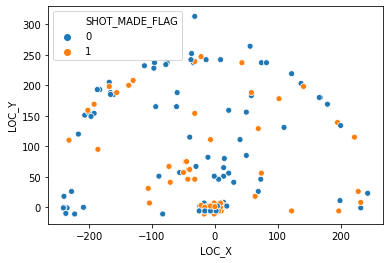

In [36]:
sns.scatterplot(x = 'LOC_X', y = 'LOC_Y', 
                data = df_shots_all, hue='SHOT_MADE_FLAG')

### Use the team dictionary from above to get full name of home and visitor team

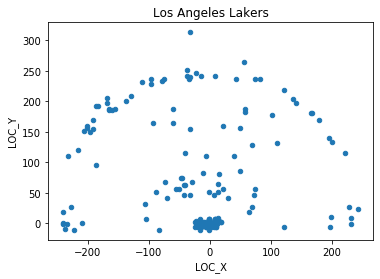

In [37]:
full_home_team = team_dic[home_team]
full_visitor_team = team_dic[visitor_team]
is_home = df_shots_all['TEAM_NAME'] == full_home_team
ax = df_shots_all.plot('LOC_X', 'LOC_Y', kind='scatter', title=full_home_team)
ax.set_aspect('equal')

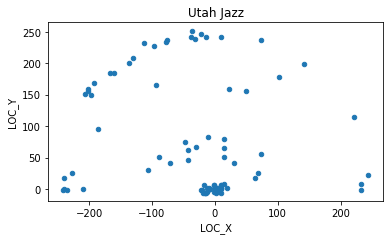

In [38]:
full_home_team = team_dic[home_team]
full_visitor_team = team_dic[visitor_team]
is_home = df_shots_all['TEAM_NAME'] == full_visitor_team
ax = df_shots_all[is_home].plot('LOC_X', 'LOC_Y', kind='scatter', title=full_visitor_team)
ax.set_aspect('equal')

### Getting Dataframe with each event description

In [39]:
df_desc = df_pbp['HOMEDESCRIPTION'].fillna(df_pbp.VISITORDESCRIPTION).to_frame()
df_desc.rename(columns = {'HOMEDESCRIPTION':'DESCRIPTION'}, inplace = True)
df_desc['GAME_EVENT_ID'] = df_pbp['EVENTNUM']
df_desc.head()

,DESCRIPTION,GAME_EVENT_ID
0,None,0
1,Jump Ball Hibbert vs. Withey: Tip to Lyles,1
2,MISS Hayward 2' Layup,2
3,Randle REBOUND (Off:0 Def:1),3
4,MISS Bryant 24' 3PT Jump Shot,5


Merge the Description database with the shots database 

In [40]:
df_shots_all = df_shots_all.merge(df_desc, on='GAME_EVENT_ID')

### Make column for Home Team Flag

In [41]:
df_shots_all['HOME_TEAM'] = (df_shots_all['TEAM_NAME'] == full_home_team).astype(int)
df_shots_all.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG,POINTS,DESCRIPTION,HOME_TEAM
0,2,Gordon Hayward,202330,Utah Jazz,1.610613e+09,1,11,40,2PT Field Goal,-17.0,7.0,0,0,MISS Hayward 2' Layup,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,11,25,3PT Field Goal,137.0,203.0,0,0,MISS Bryant 24' 3PT Jump Shot,1
2,8,Rodney Hood,203918,Utah Jazz,1.610613e+09,1,11,12,2PT Field Goal,-11.0,82.0,0,0,MISS Hood 8' Pullup Jump Shot,0
3,10,Jeff Withey,203481,Utah Jazz,1.610613e+09,1,10,59,2PT Field Goal,-43.0,46.0,1,2,Withey 6' Floating Jump Shot (2 PTS) (Mack 1 AST),0
4,11,Kobe Bryant,977,Los Angeles Lakers,1.610613e+09,1,10,44,2PT Field Goal,199.0,11.0,0,0,MISS Bryant 20' Jump Shot,1


### Examining Shot Locations

Looking at the range of LOC_X and LOC_Y columns it seems apparent that the dimensions are feet multiplied by 10 since a basketball court is 94ft long by 50ft wide.

Since, there are negative values for LOC_X some more investigation yields that the actual basket is located at LOC_X equal to 0. The actual basket is 4 feet from the edge of the court (-40 for LOC_Y). This means the max value for LOC_Y would be 900.



The same values for LOC_X and LOC_Y are used regardless of the team. To animate a game, we need to translate the shots of one team over to the other side of the court. For the visiting team we subtract the x-axis location from 900 to move it to the other side of the court. Note, we also transposed so that our court will be wide and not long.


In [42]:
is_home = df_shots_all['HOME_TEAM'] == 1
x = df_shots_all['LOC_Y'] + 40
x = np.where(is_home, x, 900 - x)

df_shots_all['LOC_X_NEW'] = x
df_shots_all['LOC_Y_NEW'] = df_shots_all['LOC_X']

### Build Static Visualization - Create Court

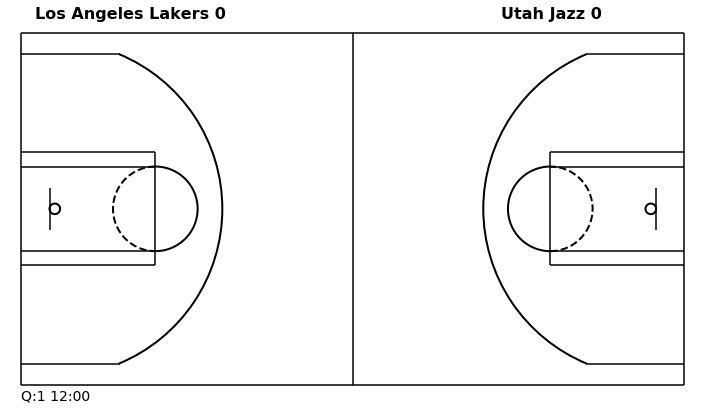

In [43]:
def create_court():
    # Set-up figure
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_axes([.2, .1, .6, .8], frame_on=False, xticks=[], yticks=[])
    ax.set_aspect('equal')
    
    # Draw the borders of the court
    ax.set_xlim(-20, 960)
    ax.vlines([0, 940], -250, 250)
    ax.hlines([-250, 250], 0, 940)
    ax.hlines([-80, -80, 80, 80], [0, 750] * 2, [190, 940] * 2)
    ax.hlines([-60, -60, 60, 60], [0, 750] * 2, [190, 940] * 2)
    ax.vlines([190, 750], -80, 80)
    ax.vlines(470, -250, 250)
    ax.vlines([40, 900], -30, 30)

    # Add the three point arc, free throw circle, midcourt circle and backboard and rim
    ax.add_patch(Arc((190, 0), 120, 120, theta1=-90, theta2=90, linewidth=2))
    ax.add_patch(Arc((190, 0), 120, 120, theta1=90, theta2=-90, linewidth=2, linestyle='dashed'))
    ax.add_patch(Arc((750, 0), 120, 120, theta1=90, theta2=-90, linewidth=2))
    ax.add_patch(Arc((750, 0), 120, 120, theta1=-90, theta2=90, linewidth=2, linestyle='dashed'))
    ax.hlines([-220, -220, 220, 220], [0, 800] * 2, [140, 940] * 2)
    ax.add_patch(Arc((47.5, 0), 475, 475, theta1=-67.5, theta2=67.5, linewidth=2))
    ax.add_patch(Arc((892.5, 0), 475, 475, theta1=112.5, theta2=-112.5, linewidth=2))
    ax.add_patch(Arc((47.5, 0), 15, 15, theta1=0, theta2=360, linewidth=2))
    ax.add_patch(Arc((892.5, 0), 15, 15, theta1=0, theta2=360, linewidth=2))
    ax.add_patch(Circle((470, 0), 60, facecolor='none', lw=2))
    
    # Assign to variables the plot items that will change after each iteration
    ax.text(20, 270, f"{full_home_team} 0" , 
            fontsize=16, fontweight='bold', label='home')
    ax.text(680, 270, f"{full_visitor_team} 0", 
            fontsize=16, fontweight='bold', label='visitor')
    ax.text(0, -270, "Q:1 12:00", fontsize= 14, label='time')
    ax.text(200, -270, "", fontsize=14, label='description')
    return fig, ax

fig, ax = create_court()

### Add Shot Data to Court

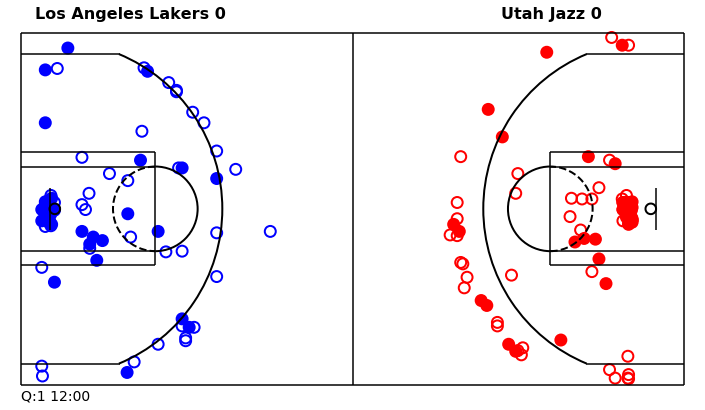

In [44]:
fig, ax = create_court()

missed = df_shots_all['SHOT_MADE_FLAG'] == 0
edgecolor = df_shots_all['HOME_TEAM'].replace({0: 'r', 1:'b'})
facecolor = edgecolor.copy()
facecolor[missed] = 'none' 

df_shots_all['FACECOLOR'] = facecolor
df_shots_all['EDGECOLOR'] = edgecolor
ax.scatter('LOC_X_NEW', 'LOC_Y_NEW', marker='o', s=120, facecolors='FACECOLOR',
           edgecolors='EDGECOLOR', lw=2, data=df_shots_all)


### Get Player Imgaes

In [45]:
unique_players = df_shots_all[['TEAM_ID', 'PLAYER_ID']].drop_duplicates()
unique_players.head()

,TEAM_ID,PLAYER_ID
0,1.610613e+09,202330
1,1.610613e+09,977
2,1.610613e+09,203918
3,1.610613e+09,203481
5,1.610613e+09,201579


In [46]:
base_image_url = "https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/"
year = int(params['Season'][:4]) + 1
player_image_data = {}
for _, row in unique_players.iterrows():
    team_id = row['TEAM_ID'].astype(int)
    player_id = row['PLAYER_ID'].astype(int)
    end_image_url = f"{team_id}/{year}/260x190/{player_id}.png"
    try:
        image_array = plt.imread(base_image_url + end_image_url)
    except:
        end_image_url = f"{team_id}/{year - 1}/260x190/{player_id}.png"
        image_array = plt.imread(base_image_url + end_image_url)
    if team_id not in player_image_data:
        player_image_data[team_id] = {player_id: image_array}
    else:
        player_image_data[team_id][player_id] = image_array

In [47]:
from matplotlib.animation import FuncAnimation
fig, ax = create_court()
ax_image_left = fig.add_axes((0, 0, .2, .2), zorder=-1, 
                             frame_on=False, xticks=[], yticks=[])
ax_image_right = fig.add_axes((.8, 0, .2, .2), zorder=-1, 
                              frame_on=False, xticks=[], yticks=[])
im_left = ax_image_left.imshow([[0]])
im_right = ax_image_right.imshow([[0]])
im_left.set_data([[]])
im_right.set_data([[]])

scores = {'visitor': 0, 'home': 0} 
texts = {t.get_label(): t for t in ax.texts}

def init():
    scores['home'] = 0
    scores['visitor'] = 0
    texts['home'].set_text(f"{full_home_team} {scores['home']}")
    texts['visitor'].set_text(f"{full_visitor_team} {scores['visitor']}")
    texts['time'].set_text("Q:1 12:00")               
    texts['description'].set_text("")
    im_left.set_data([[]])
    im_right.set_data([[]])
                              
# The update function is called as frequently as the interval parameter below (in milliseconds).
def update(frame_number):
    # Change the score
    if frame_number == 0:
        return
                              
    im_left.set_data([[]])
    im_right.set_data([[]])

    current_row = df_shots_all.iloc[frame_number - 1]
    ax.scatter('LOC_X_NEW', 'LOC_Y_NEW', marker='o', s=120,
                      facecolors='FACECOLOR', edgecolors='EDGECOLOR', 
                      lw=2, data=current_row);

    team_type = 'home' if current_row['HOME_TEAM'] == 1 else 'visitor'
    scores[team_type] += current_row['POINTS']
    texts['home'].set_text(f"{full_home_team} {scores['home']}")
    texts['visitor'].set_text(f"{full_visitor_team} {scores['visitor']}")
    
    per = current_row['PERIOD']
    mr = current_row['MINUTES_REMAINING']
    sr = current_row['SECONDS_REMAINING']
    texts['time'].set_text(f"Q:{per} {mr:02d}:{sr:02d}")               
    texts['description'].set_text(current_row['DESCRIPTION'])
                              
    team_id = current_row['TEAM_ID']
    player_id = current_row['PLAYER_ID']
    image_array = player_image_data[team_id][player_id]

    if team_type == 'home':
        im_left.set_data(image_array)
    else:
        im_right.set_data(image_array)

animation = FuncAnimation(fig, func=update, frames=len(df_shots_all) + 1, 
                          init_func=init, interval=10, repeat=False)

plt.close(animation._fig)



In [48]:
from celluloid import Camera

animation.save('animation.gif', writer='matplotlib.animation.PillowWriter', fps=.7)

MovieWriter matplotlib.animation.PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


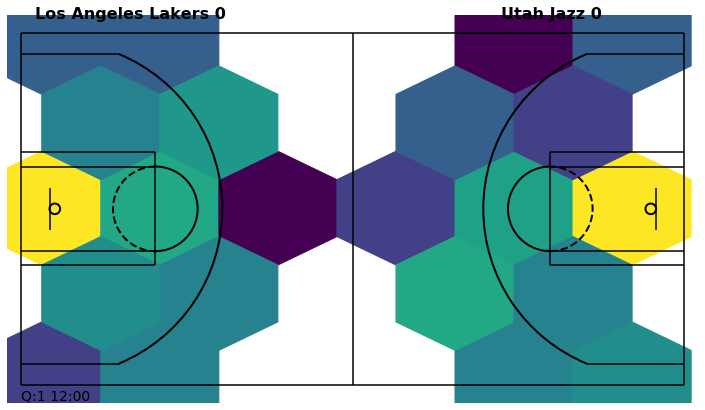

In [68]:
fig, ax = create_court()

missed = df_shots_all['SHOT_MADE_FLAG'] == 0
edgecolor = df_shots_all['HOME_TEAM'].replace({0: 'r', 1:'b'})
facecolor = edgecolor.copy()
facecolor[missed] = 'none' 

df_shots_all['FACECOLOR'] = facecolor
df_shots_all['EDGECOLOR'] = edgecolor
ax.hexbin('LOC_X_NEW', 'LOC_Y_NEW',  data=df_shots_all, gridsize=5, bins='log', cmap='viridis', mincnt=.1)



In [69]:
from nba_api.stats.endpoints import playbyplayv2, shotchartdetail, playergamelogs, playercareerstats, playergamelog

game_id = '0021501228'
pbp = playbyplayv2.PlayByPlayV2(game_id)
pbp = pbp.get_data_frames()[0]
pbp.head()
shot_chart = shotchartdetail.ShotChartDetail(0,0,game_id_nullable=game_id, context_measure_simple='FGA')
shot_chart = shot_chart.get_data_frames()[0]
shot_chart.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021501228,2,202330,Gordon Hayward,1610612762,Utah Jazz,1,11,40,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-17,7,1,0,20160413,LAL,UTA
1,Shot Chart Detail,0021501228,5,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,11,25,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,137,203,1,0,20160413,LAL,UTA
2,Shot Chart Detail,0021501228,8,203918,Rodney Hood,1610612762,Utah Jazz,1,11,12,Missed Shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,8,-11,82,1,0,20160413,LAL,UTA
3,Shot Chart Detail,0021501228,10,203481,Jeff Withey,1610612762,Utah Jazz,1,10,59,Made Shot,Floating Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-43,46,1,1,20160413,LAL,UTA
4,Shot Chart Detail,0021501228,11,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,10,44,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,19,199,11,1,0,20160413,LAL,UTA
